# Plot of Reference Weather station Data and Clustering to find Representative dates for the ROM Model


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Load the CSV without setting index yet
data = pd.read_csv(r'..\RawMeasurementData\Atmosphere\RefStation_detailed_data_localtime_March-August2024.csv')

In [3]:
data.head()

,Date,Time,TM°C,TX°C,TN°C,HRM%,PPTmm,VVM (10 m)km/h,DVM (10 m)graus,VVX (10 m)km/h,PMhPa,RSW/m2
0,2024-03-01,01:00,11.1,11.1,11.0,85,0.0,13.0,34,28.1,1008.6,0
1,2024-03-01,01:30,11.0,11.1,10.8,82,0.0,4.7,327,14.4,1008.8,0
2,2024-03-01,02:00,10.7,11.0,10.6,83,0.1,9.7,313,21.2,1009.1,0
3,2024-03-01,02:30,10.7,10.9,10.6,80,0.0,10.1,328,21.2,1008.5,0
4,2024-03-01,03:00,10.9,11.4,10.6,72,0.0,15.5,328,32.0,1008.4,0


In [ ]:
#Ensure "Date" and "Time" columns exist
if 'Date' in data.columns and 'Time' in data.columns:
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('Datetime', inplace=True)
    #Drop the original Date and Time columns
    data.drop(columns=['Date', 'Time'], inplace=True)
else:
    print(" 'Date' and 'Time' columns not found in the dataset!")

In [ ]:
# all columns numeric
numeric_columns = {
    "TM°C": "Avg Temperature (C)",
    "TX°C": "Max Temperature (C)",
    "TN°C": "Min Temperature(C)",
    "HRM%": "Relative Humidity",
    "PPTmm": "Precipitation (mm)",
    "VVM (10 m)km/h": "Avg Windspeed (km/h)",
    "DVM (10 m)graus": "Avg Wind Direction",
    "VVX (10 m)km/h": "Max Windspeed (km/h)",
    "PMhPa": "Air Pressure (hPa)",
    "RSW/m2": "Avg Solar Irradiance (W/m2)"
}
data.rename(columns=numeric_columns, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data = data[~data.index.duplicated(keep='first')]
data = data.sort_index()
data.interpolate(method='linear', inplace=True)

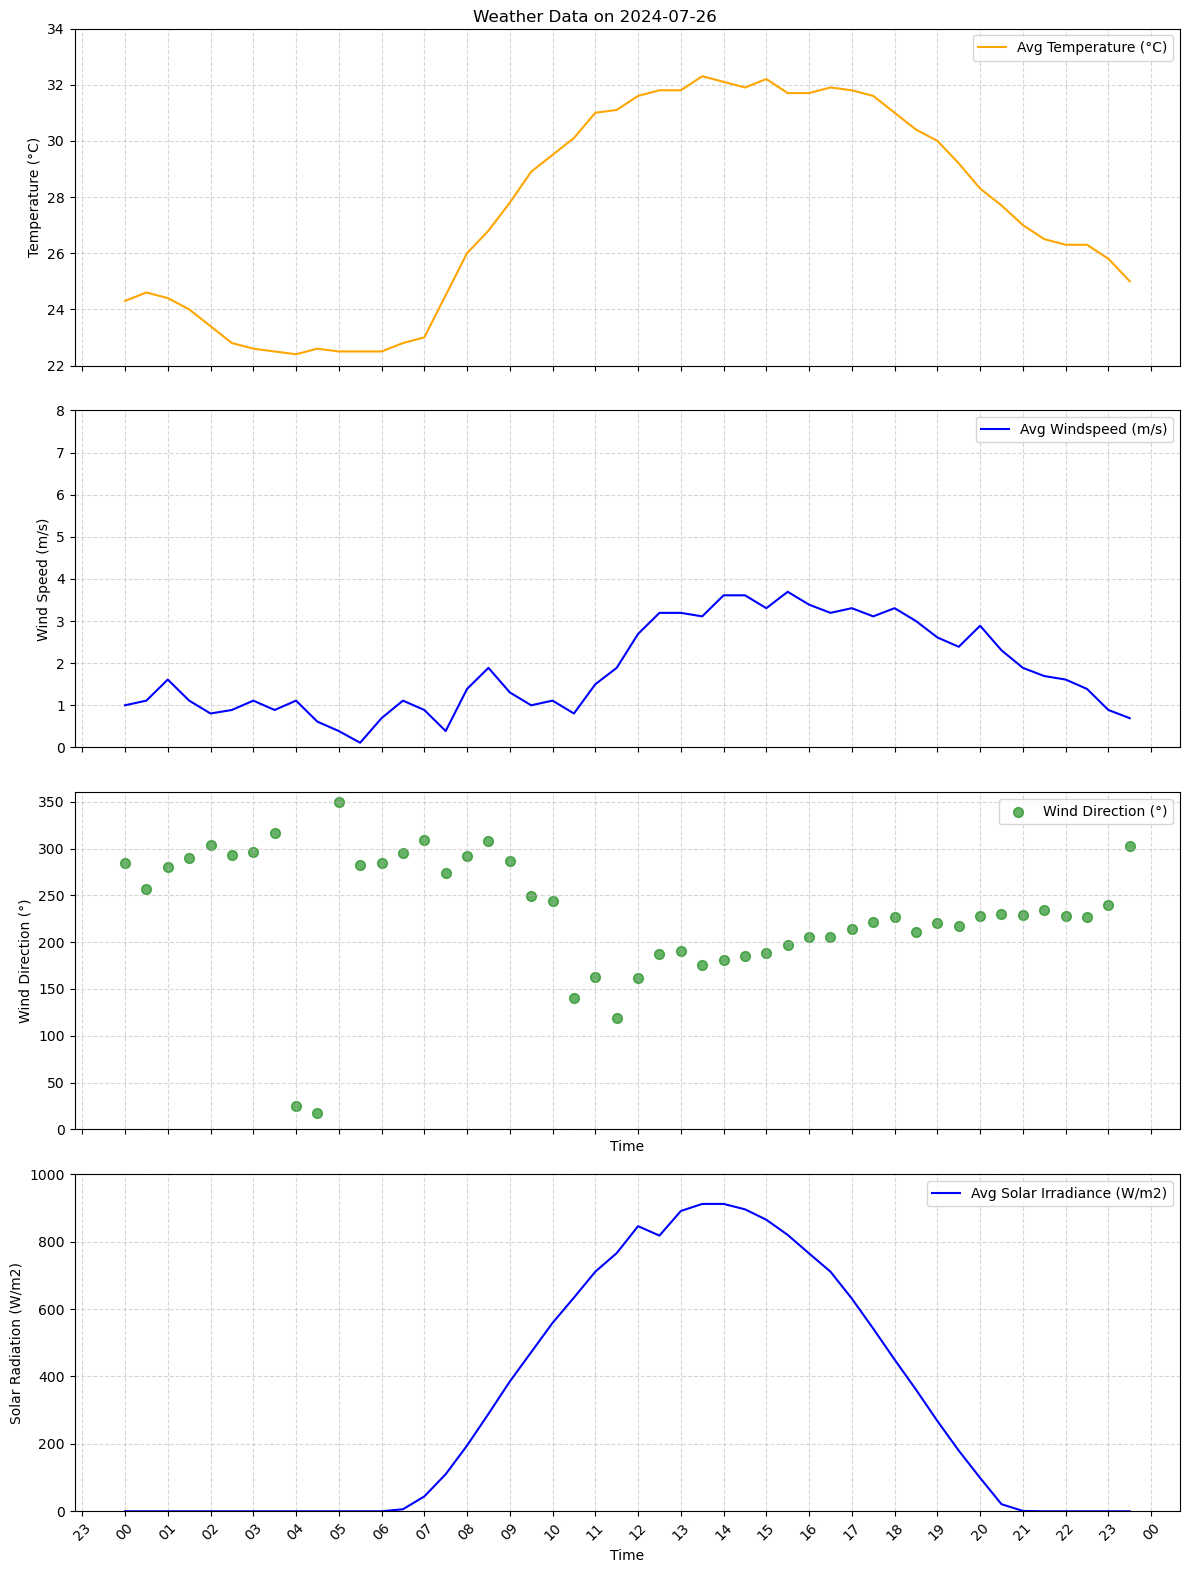

In [ ]:
# Filter April 2024 for plotting
# date1, date2 = '2024-04-01', '2024-04-30'
# data = data.loc[date1:date2]
import matplotlib.pyplot as plt

# Filter data for the specific date
date1 = '2024-07-26'

data_filtered = data.loc[date1]
# Convert wind speed from km/h to m/s
data_filtered['Avg Windspeed (m/s)'] = data_filtered['Avg Windspeed (km/h)'] /3.6

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

axes[0].plot(data_filtered.index, data_filtered['Avg Temperature (C)'], 
             color='orange', linewidth=1.5, label='Avg Temperature (°C)')
axes[0].set_ylim(22, 34)
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)

axes[1].plot(data_filtered.index, data_filtered['Avg Windspeed (m/s)'], 
             color='blue', linewidth=1.5, label='Avg Windspeed (m/s)')
axes[1].set_ylim(0, 8)
axes[1].set_ylabel("Wind Speed (m/s)")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)

axes[2].scatter(data_filtered.index, data_filtered['Avg Wind Direction'], 
                color='green', marker='o', s=50, alpha=0.6, label='Wind Direction (°)')
axes[2].set_ylim(0, 360)
axes[2].set_ylabel("Wind Direction (°)")
axes[2].set_xlabel("Time")
axes[2].xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Major ticks every hour
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%H'))  # Format ticks to show only hours
axes[2].legend()
axes[2].grid(True, linestyle="--", alpha=0.5)

axes[3].plot(data_filtered.index, data_filtered['Avg Solar Irradiance (W/m2)'], 
             color='blue', linewidth=1.5, label='Avg Solar Irradiance (W/m2)')
axes[3].set_ylim(0, 1000)
axes[3].set_ylabel("Solar Radiation (W/m2)")
axes[3].set_xlabel("Time")
axes[3].xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Major ticks every hour
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%H'))  # Format ticks to show only hours
axes[3].legend()
axes[3].grid(True, linestyle="--", alpha=0.5)


# Formatting
plt.suptitle(f"Weather Data on {date1}")
# plt.suptitle(f"Weather Data from March to August 2024")

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [7]:
data_filtered['Avg Wind Direction']

Datetime
2024-07-26 00:00:00    284.0
2024-07-26 00:30:00    257.0
2024-07-26 01:00:00    280.0
2024-07-26 01:30:00    290.0
2024-07-26 02:00:00    304.0
2024-07-26 02:30:00    293.0
2024-07-26 03:00:00    296.0
2024-07-26 03:30:00    317.0
2024-07-26 04:00:00     25.0
2024-07-26 04:30:00     17.0
2024-07-26 05:00:00    350.0
2024-07-26 05:30:00    282.0
2024-07-26 06:00:00    285.0
2024-07-26 06:30:00    295.0
2024-07-26 07:00:00    309.0
2024-07-26 07:30:00    274.0
2024-07-26 08:00:00    292.0
2024-07-26 08:30:00    308.0
2024-07-26 09:00:00    287.0
2024-07-26 09:30:00    249.0
2024-07-26 10:00:00    244.0
2024-07-26 10:30:00    140.0
2024-07-26 11:00:00    163.0
2024-07-26 11:30:00    119.0
2024-07-26 12:00:00    162.0
2024-07-26 12:30:00    187.0
2024-07-26 13:00:00    191.0
2024-07-26 13:30:00    176.0
2024-07-26 14:00:00    181.0
2024-07-26 14:30:00    185.0
2024-07-26 15:00:00    188.0
2024-07-26 15:30:00    197.0
2024-07-26 16:00:00    206.0
2024-07-26 16:30:00    205.0
2024-

# Clustering

In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "10"  # or "2", or however many you want

In [10]:
data.columns

Index(['Avg Temperature (C)', 'Max Temperature (C)', 'Min Temperature(C)',
       'Relative Humidity', 'Precipitation (mm)', 'Avg Windspeed (km/h)',
       'Avg Wind Direction', 'Max Windspeed (km/h)', 'Air Pressure (hPa)',
       'Avg Solar Irradiance (W/m2)'],
      dtype='object')

# Cluster with Winddir And windspeed

✅ Found 153 full 24-hour days
✅ Valid days for clustering: 153


c:\Users\Citylab\.conda\envs\torchenv2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Citylab\.conda\envs\torchenv2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Citylab\.conda\envs\torchenv2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Citylab\.conda\envs\torchenv2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

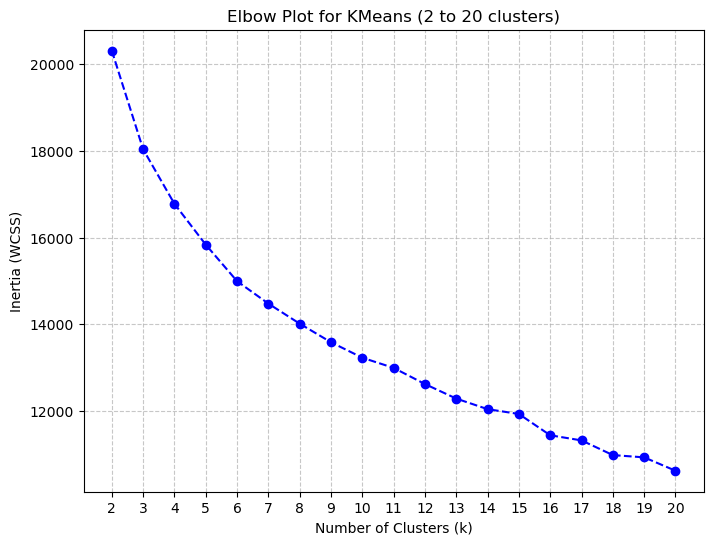

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Convert wind speed from km/h to m/s
data['Avg Windspeed (m/s)'] = data['Avg Windspeed (km/h)'] / 3.6

# Identify full 24-hour days (48 half-hour points)
day_counts = data.groupby(data.index.date).size()
full_day_dates = day_counts[day_counts == 48].index
print(f"✅ Found {len(full_day_dates)} full 24-hour days")

mask = pd.to_datetime(data.index.date).isin(pd.to_datetime(full_day_dates))
full_days = data[mask]
if full_days.empty:
    print("⚠️ No full days found after filtering. Check your data range or completeness.")

feature_list = [
    'Avg Temperature (C)',
    'Avg Windspeed (m/s)',
    'Avg Wind Direction',
    'Avg Solar Irradiance (W/m2)'
]
daily_vectors = []
valid_dates = []
for date_val in full_day_dates:
    group = full_days[full_days.index.date == date_val]
    vec = []
    for feat in feature_list:
        vals = group[feat].values
        #Expect 48 half-hour records
        if len(vals) == 48 and not np.isnan(vals).any():
            vec.extend(vals)
    #We want exactly 4 features × 48 steps = 192 values
    if len(vec) == 4 * 48:
        daily_vectors.append(vec)
        valid_dates.append(date_val)

X = np.array(daily_vectors)
print(f"✅ Valid days for clustering: {len(valid_dates)}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K_range = range(2, 21)  #k = 2 to 20

for k in K_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(X_scaled)  #X_scaled is scaled daily vectors
    inertias.append(kmeans_test.inertia_)

#lot the Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, 'o--', color='blue', linewidth=1.5, markersize=6)
plt.title('Elbow Plot for KMeans (2 to 20 clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(K_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Columns after reset_index(): Index(['Datetime', 'Avg Temperature (C)', 'Max Temperature (C)',
       'Min Temperature(C)', 'Relative Humidity', 'Precipitation (mm)',
       'Avg Windspeed (km/h)', 'Avg Wind Direction', 'Max Windspeed (km/h)',
       'Air Pressure (hPa)', 'Avg Solar Irradiance (W/m2)',
       'Avg Windspeed (m/s)'],
      dtype='object')
Before merge shape: (7344, 13)
After merge shape: (7344, 14)
            Date  Cluster
5018  2024-06-13        1
5225  2024-06-17        1
6143  2024-07-06        3
373   2024-03-08        4
4097  2024-05-25        1
1694  2024-04-05        0
2975  2024-05-01        4
4043  2024-05-24        3
1468  2024-03-31        4
3727  2024-05-17        0
cluster_means shape: (288, 6)


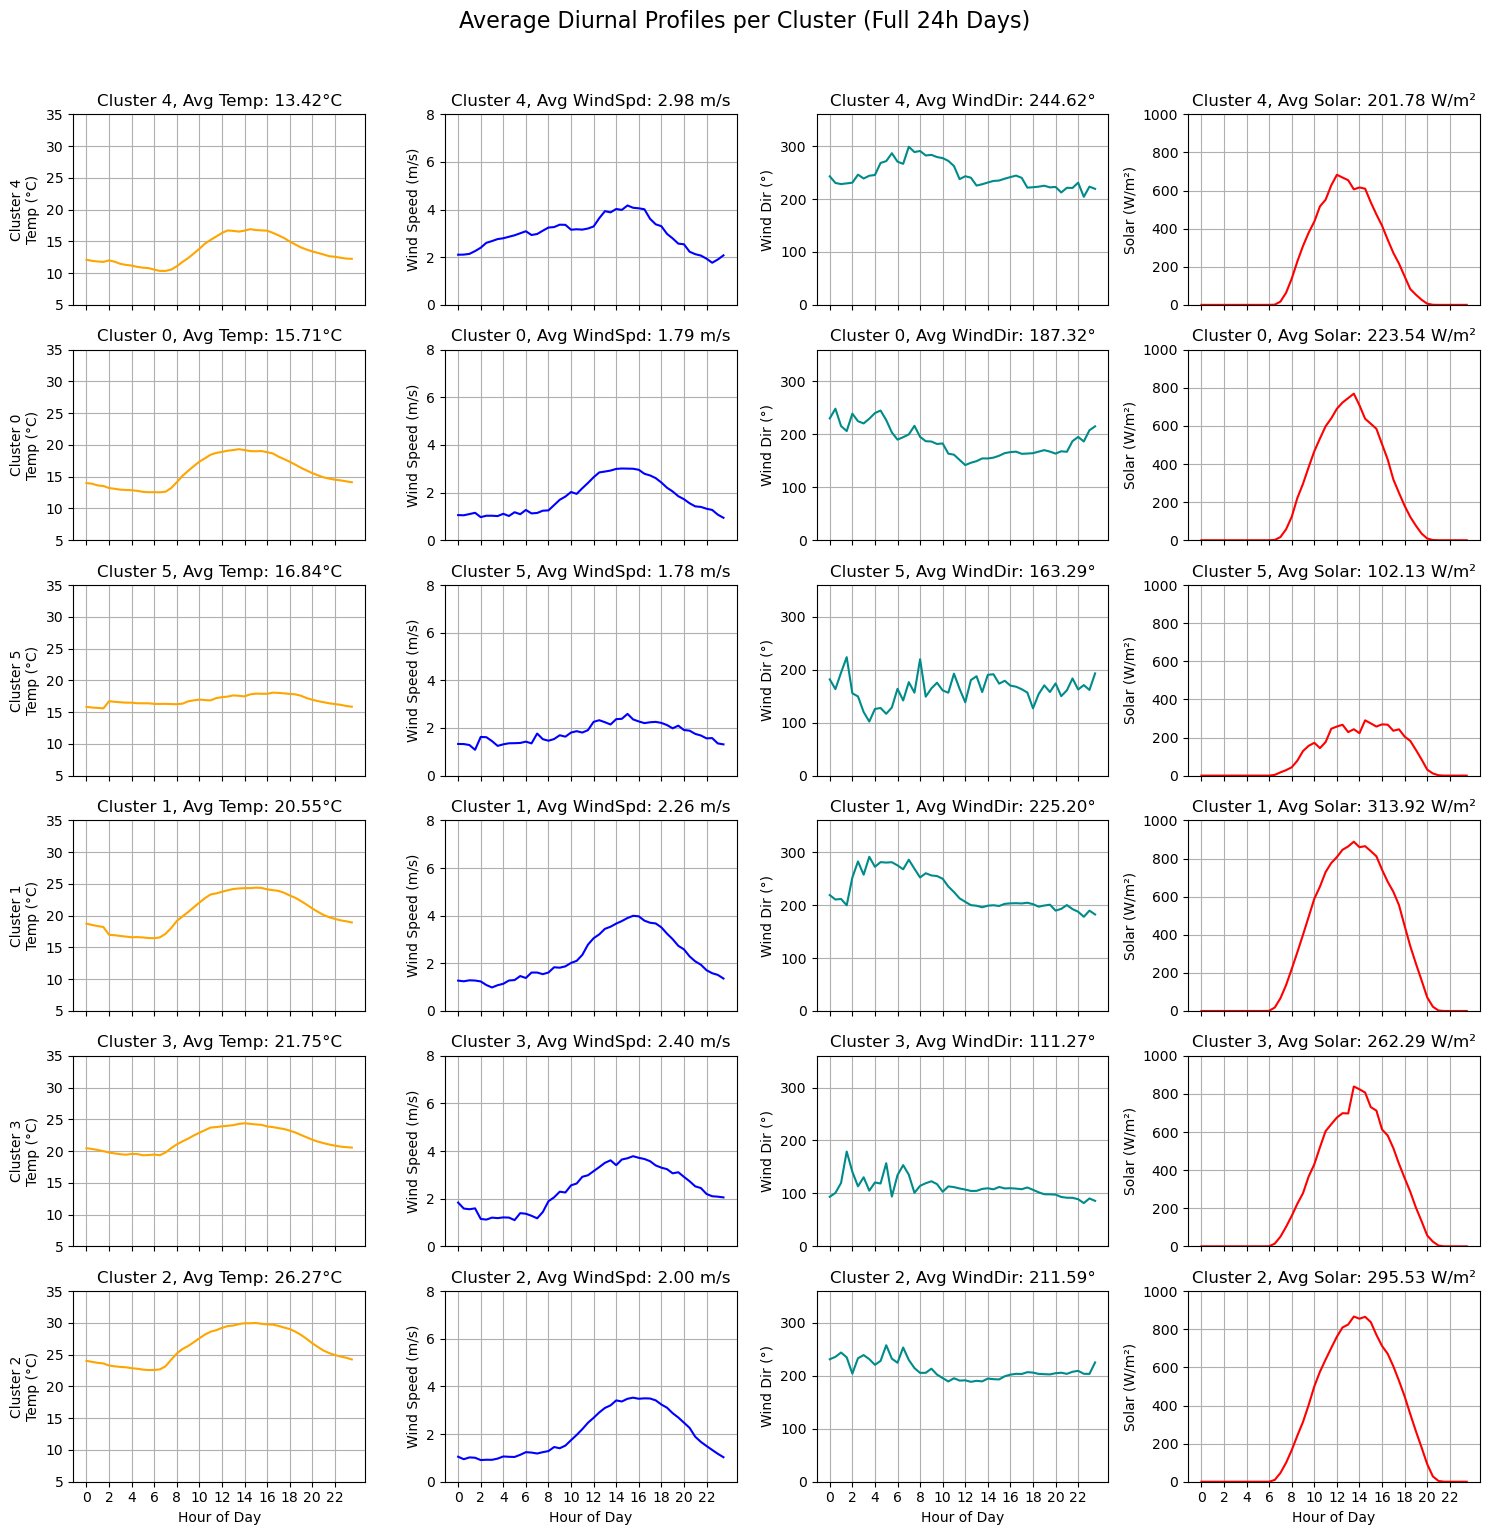

Representative days per cluster:
Cluster 0: 2024-03-17
Cluster 1: 2024-05-29
Cluster 2: 2024-07-20
Cluster 3: 2024-05-24
Cluster 4: 2024-04-01
Cluster 5: 2024-03-24


In [12]:

daily_cluster_df = pd.DataFrame({'Date': valid_dates, 'Cluster': labels})

#Merge cluster labels into full_days
full_days_reset = full_days.reset_index()
print("Columns after reset_index():", full_days_reset.columns)

#Rename the first column to 'OriginalDatetime'
col0 = full_days_reset.columns[0]
full_days_reset.rename(columns={col0: 'OriginalDatetime'}, inplace=True)

# Ensure 'Date' is a Python date
full_days_reset['Date'] = full_days_reset['OriginalDatetime'].dt.date

before_merge_shape = full_days_reset.shape
full_days_merged = full_days_reset.merge(daily_cluster_df, on='Date', how='left')
after_merge_shape = full_days_merged.shape
print("Before merge shape:", before_merge_shape)
print("After merge shape:", after_merge_shape)

print(full_days_merged[['Date','Cluster']].sample(10))

#Restore DatetimeIndex
full_days_merged.set_index('OriginalDatetime', inplace=True)
full_days_merged.index = pd.to_datetime(full_days_merged.index)
full_days_merged['Hour'] = full_days_merged.index.hour + full_days_merged.index.minute / 60

#Compute average hourly profiles per cluster
cluster_means = full_days_merged.groupby(['Cluster', 'Hour'])[feature_list].mean().reset_index()
print("cluster_means shape:", cluster_means.shape)

if cluster_means.empty:
    print(" cluster_means is empty! Possibly no merges matched or no cluster labels assigned.")
else:
    #Sort clusters by mean daily temperature
    cluster_order = (
        full_days_merged.groupby("Cluster")["Avg Temperature (C)"]
        .mean()
        .sort_values()
        .index.tolist()
    )

    fig, axes = plt.subplots(6, 4, figsize=(15, 15), sharex=True)

    # Color map for the four features
    colors = {
        'Avg Temperature (C)': 'orange',
        'Avg Windspeed (m/s)': 'blue',
        'Avg Wind Direction': 'darkcyan',
        'Avg Solar Irradiance (W/m2)': 'red'
    }

    for i, cluster in enumerate(cluster_order):
        subset = cluster_means[cluster_means['Cluster'] == cluster]

        # 1) Temperature
        axes[i, 0].plot(subset['Hour'], subset['Avg Temperature (C)'], color=colors['Avg Temperature (C)'])
        axes[i, 0].set_ylabel(f'Cluster {cluster}\nTemp (°C)')
        axes[i, 0].set_ylim(5, 35)
        axes[i, 0].set_title(f'Cluster {cluster}, Avg Temp: {subset["Avg Temperature (C)"].mean():.2f}°C')
        axes[i, 0].grid()

        # 2) Wind Speed (m/s)
        axes[i, 1].plot(subset['Hour'], subset['Avg Windspeed (m/s)'], color=colors['Avg Windspeed (m/s)'])
        axes[i, 1].set_ylabel('Wind Speed (m/s)')
        axes[i, 1].set_ylim(0, 8)
        axes[i, 1].set_title(f'Cluster {cluster}, Avg WindSpd: {subset["Avg Windspeed (m/s)"].mean():.2f} m/s')
        axes[i, 1].grid()

        # 3) Wind Direction
        axes[i, 2].plot(subset['Hour'], subset['Avg Wind Direction'], color=colors['Avg Wind Direction'])
        axes[i, 2].set_ylabel('Wind Dir (°)')
        axes[i, 2].set_ylim(0, 360)
        axes[i, 2].set_title(f'Cluster {cluster}, Avg WindDir: {subset["Avg Wind Direction"].mean():.2f}°')
        axes[i, 2].grid()

        # 4) Solar
        axes[i, 3].plot(subset['Hour'], subset['Avg Solar Irradiance (W/m2)'], color=colors['Avg Solar Irradiance (W/m2)'])
        axes[i, 3].set_ylabel('Solar (W/m²)')
        axes[i, 3].set_ylim(0, 1000)
        axes[i, 3].set_title(f'Cluster {cluster}, Avg Solar: {subset["Avg Solar Irradiance (W/m2)"].mean():.2f} W/m²')
        axes[i, 3].grid()

    for ax in axes[-1, :]:
        ax.set_xlabel('Hour of Day')
        ax.set_xticks(range(0, 24, 2))

    plt.suptitle('Average Diurnal Profiles per Cluster (Full 24h Days)', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 6) Select Representative Day per Cluster
# -------------------------------
representative_days = {}
for cluster in np.unique(labels):
    # Indices of days in this cluster
    idx = np.where(labels == cluster)[0]
    
    # Cluster center
    cluster_center = kmeans.cluster_centers_[cluster]
    
    # Distances
    distances = np.linalg.norm(X_scaled[idx] - cluster_center, axis=1)
    rep_idx = idx[np.argmin(distances)]
    representative_days[cluster] = valid_dates[rep_idx]

print("Representative days per cluster:")
for cluster in sorted(representative_days.keys()):
    print(f"Cluster {cluster}: {representative_days[cluster]}")


In [13]:
import numpy as np

# kmeans is trained model
# labels are the cluster assignments for each daily vector
# X_scaled is  scaled daily vectors
# valid_dates is the list of day dates

cluster_centers = kmeans.cluster_centers_

# Distances for each day to its assigned cluster center
representative_days_dict = {}

for cluster_label in np.unique(labels):
    # Indices of days belonging to this cluster
    idx = np.where(labels == cluster_label)[0]

    # The cluster center for this label
    center = cluster_centers[cluster_label]

    # Distances for these days in scaled space
    dist = np.linalg.norm(X_scaled[idx] - center, axis=1)

    # Sort by distance
    sorted_idx = idx[np.argsort(dist)]

    # Pick top 2 closest days
    top_2_idx = sorted_idx[:1]
    top_2_days = [valid_dates[i] for i in top_2_idx]

    representative_days_dict[cluster_label] = top_2_days

# Print results
for cluster_label, day_list in representative_days_dict.items():
    print(f"Cluster {cluster_label} → top day: {day_list}")

Cluster 0 → top day: [datetime.date(2024, 3, 17)]
Cluster 1 → top day: [datetime.date(2024, 5, 29)]
Cluster 2 → top day: [datetime.date(2024, 7, 20)]
Cluster 3 → top day: [datetime.date(2024, 5, 24)]
Cluster 4 → top day: [datetime.date(2024, 4, 1)]
Cluster 5 → top day: [datetime.date(2024, 3, 24)]


In [20]:
daily_avgs = full_days.groupby(full_days.index.date)[feature_list].mean()

# Get 6 cluster-representative days
cluster_top_days = [day_list[0] for day_list in representative_days_dict.values()]
existing_days = set(cluster_top_days)

# Remove them from pool for edge selection
daily_avgs = daily_avgs[~daily_avgs.index.isin(existing_days)]

from collections import defaultdict

# Reset lists
lowest_extreme_days = []
highest_extreme_days = []

# Keep track of what days we’ve already picked to avoid duplicates
used_days = set(cluster_top_days)

# For each feature, find the top and bottom non-rainy days
for feat in ['Avg Temperature (C)', 'Avg Windspeed (m/s)', 'Avg Solar Irradiance (W/m2)']:
    
    # Sort ascending for lowest, descending for highest
    sorted_low = daily_avgs.sort_values(by=feat).index
    sorted_high = daily_avgs.sort_values(by=feat, ascending=False).index

    # ▸ LOW EXTREMES
    for day in sorted_low:
        if day in used_days:
            continue
        day_precip = full_days[full_days.index.date == day]['Precipitation (mm)'].sum()
        if day_precip <= 0.1:
            lowest_extreme_days.append(day)
            used_days.add(day)
            break  # Stop after one good non-rainy day

    # ▸ HIGH EXTREMES
    for day in sorted_high:
        if day in used_days:
            continue
        day_precip = full_days[full_days.index.date == day]['Precipitation (mm)'].sum()
        if day_precip <= 0.1:
            highest_extreme_days.append(day)
            used_days.add(day)
            break  # Stop after one good non-rainy day
# Confirm
print(" Lowest extremes:")
for d in lowest_extreme_days:
    print(" -", d)

print(" Highest extremes:")
for d in highest_extreme_days:
    print(" -", d)

 Lowest extremes:
 - 2024-04-23
 - 2024-04-12
 - 2024-06-10
 Highest extremes:
 - 2024-07-31
 - 2024-06-08
 - 2024-06-21


In [21]:
def filter_non_rainy_days(full_days: pd.DataFrame, selected_days: list, rain_threshold: float = 0.1) -> list:
    """
    Filters out days from selected_days where total precipitation exceeds the threshold.
    
    Args:
        full_days (pd.DataFrame): Full DataFrame with datetime index and 'Precipitation (mm)' column.
        selected_days (list): List of datetime.date objects.
        rain_threshold (float): Maximum allowed precipitation in mm for a day to be considered non-rainy.
    
    Returns:
        list: Filtered list of non-rainy days.
    """
    non_rainy_days = []
    for day in selected_days:
        day_precip = full_days[full_days.index.date == day]['Precipitation (mm)'].sum()
        if day_precip <= rain_threshold:
            non_rainy_days.append(day)
    return non_rainy_days
filtered_cluster_top_days = filter_non_rainy_days(full_days, cluster_top_days)
filtered_lowest_extreme_days = filter_non_rainy_days(full_days, lowest_extreme_days)
filtered_highest_extreme_days = filter_non_rainy_days(full_days, highest_extreme_days)


In [22]:
print("✅ Summary of Selected Non-Rainy Days\n")

# Cluster-representative days
print(f"🌀 Cluster-representative days selected (non-rainy): {len(filtered_cluster_top_days)} out of {len(cluster_top_days)}")
cluster_counts = pd.Series([full_days_merged[full_days_merged['Date'] == d]['Cluster'].iloc[0]
                            for d in filtered_cluster_top_days])
print("   Breakdown by cluster label:")
print(cluster_counts.value_counts().sort_index(), "\n")

# Lowest extremes
print(f"📉 Lowest extreme days selected (non-rainy): {len(filtered_lowest_extreme_days)} out of {len(lowest_extreme_days)}")
print("   Days:", filtered_lowest_extreme_days, "\n")

# Highest extremes
print(f"📈 Highest extreme days selected (non-rainy): {len(filtered_highest_extreme_days)} out of {len(highest_extreme_days)}")
print("   Days:", filtered_highest_extreme_days, "\n")


# Group daily precipitation totals
daily_precip = full_days.groupby(full_days.index.date)['Precipitation (mm)'].sum()

# Threshold to define "rainy"
rain_threshold = 0.1  # mm

# Count
num_rainy_days = (daily_precip > rain_threshold).sum()
num_dry_days = (daily_precip <= rain_threshold).sum()
total_days = len(daily_precip)

print("🌧️ Rain Statistics:")
print(f" - Total full 24h days: {total_days}")
print(f" - Rainy days (> {rain_threshold} mm): {num_rainy_days}")
print(f" - Dry days (≤ {rain_threshold} mm): {num_dry_days}")

✅ Summary of Selected Non-Rainy Days

🌀 Cluster-representative days selected (non-rainy): 6 out of 6
   Breakdown by cluster label:
0    1
1    1
2    1
3    1
4    1
5    1
dtype: int64 

📉 Lowest extreme days selected (non-rainy): 3 out of 3
   Days: [datetime.date(2024, 4, 23), datetime.date(2024, 4, 12), datetime.date(2024, 6, 10)] 

📈 Highest extreme days selected (non-rainy): 3 out of 3
   Days: [datetime.date(2024, 7, 31), datetime.date(2024, 6, 8), datetime.date(2024, 6, 21)] 

🌧️ Rain Statistics:
 - Total full 24h days: 153
 - Rainy days (> 0.1 mm): 33
 - Dry days (≤ 0.1 mm): 120


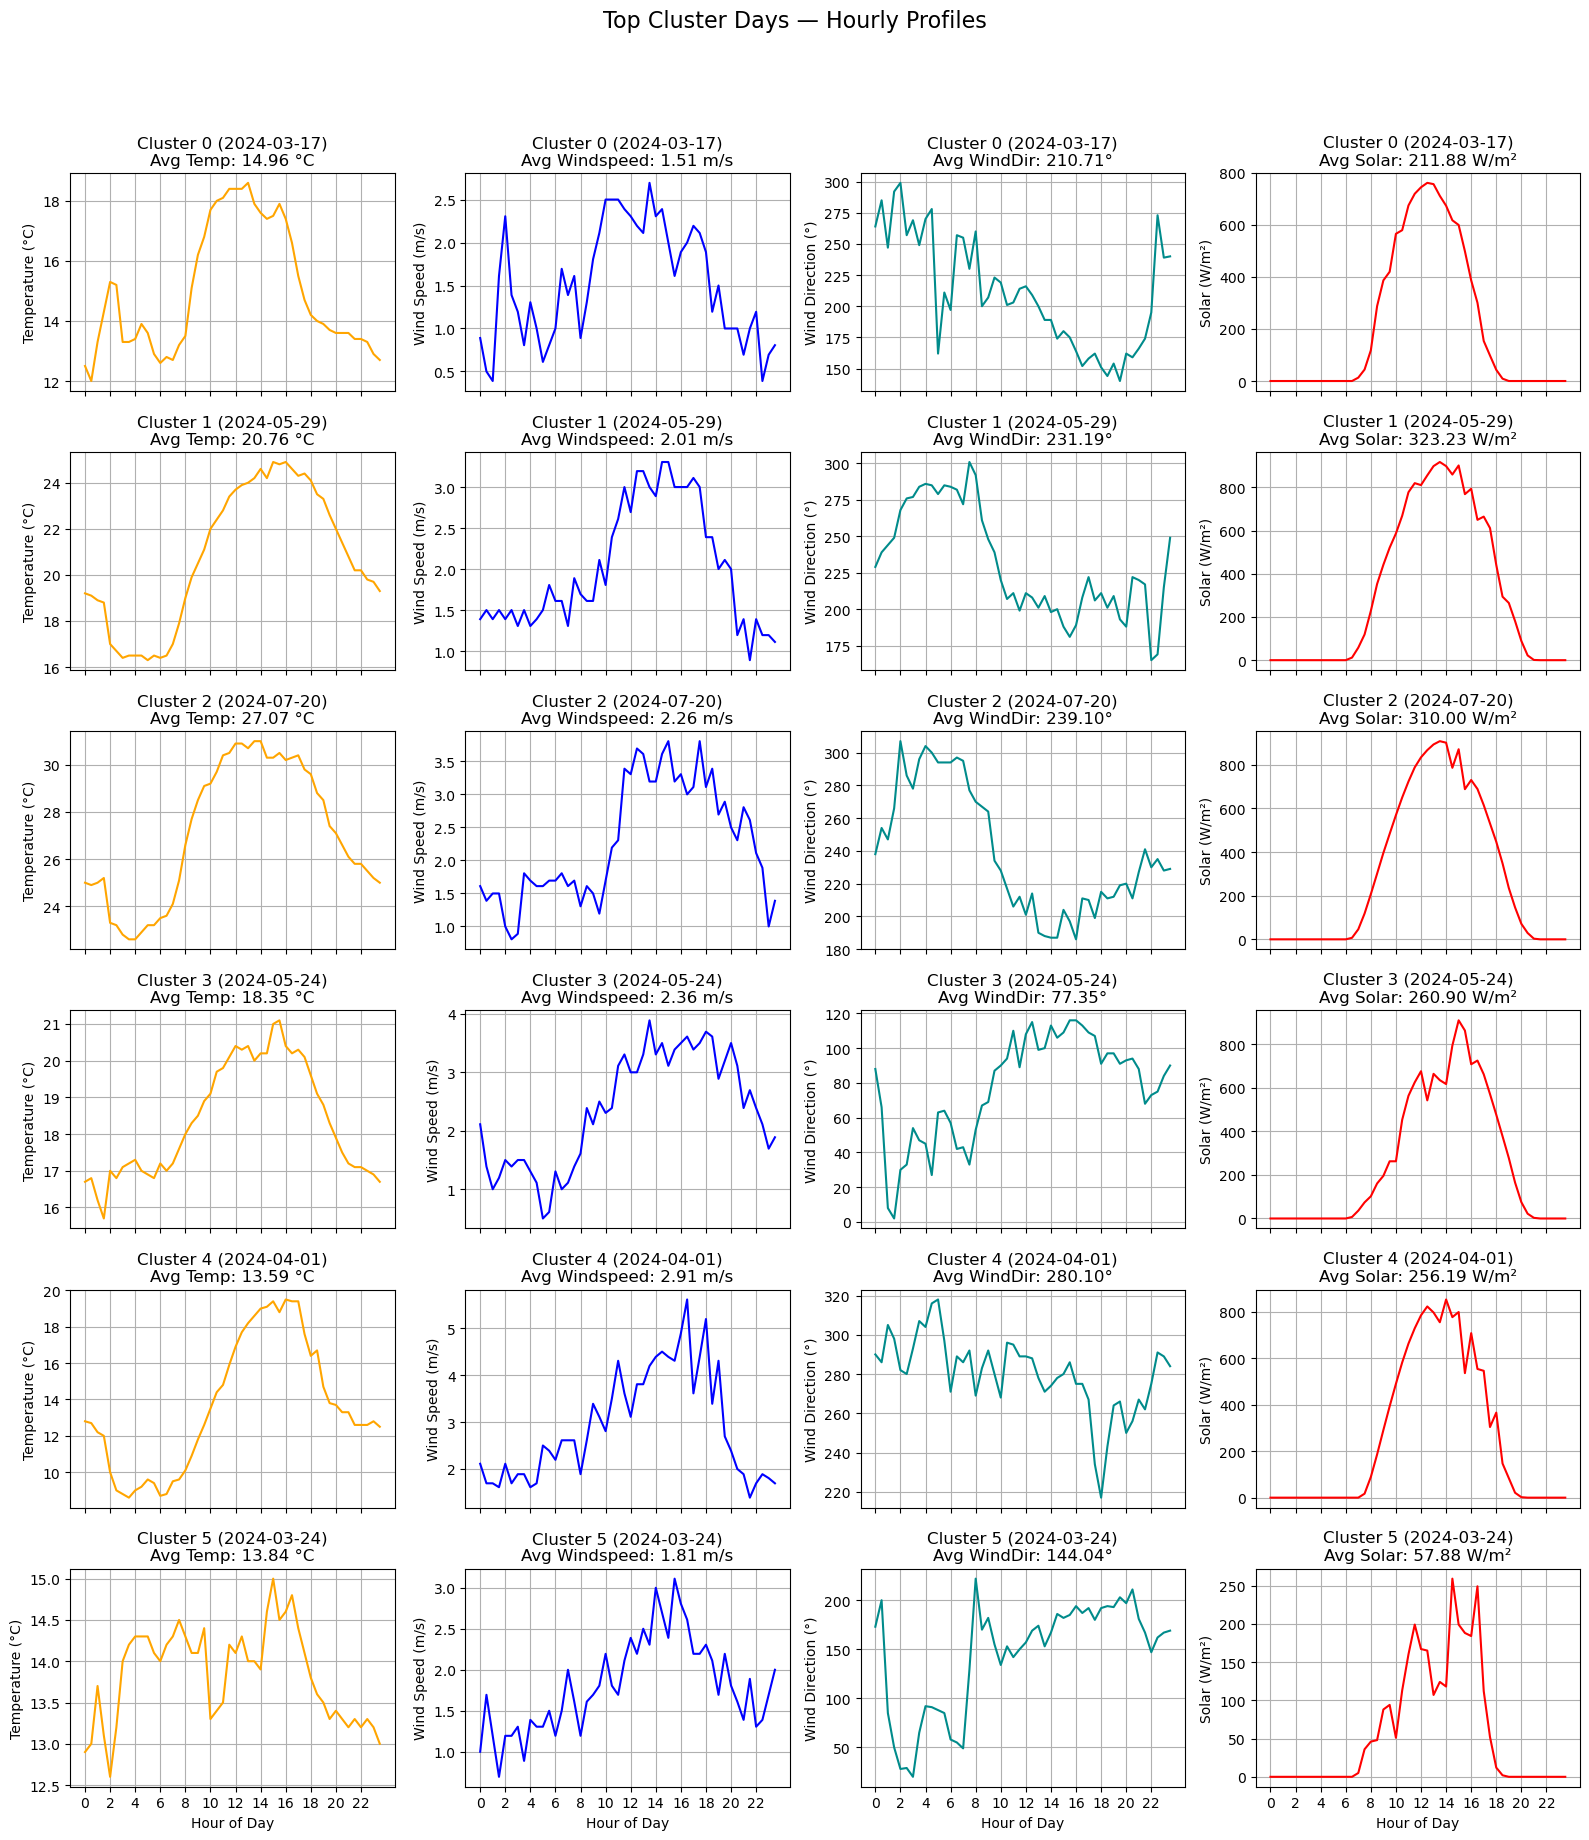

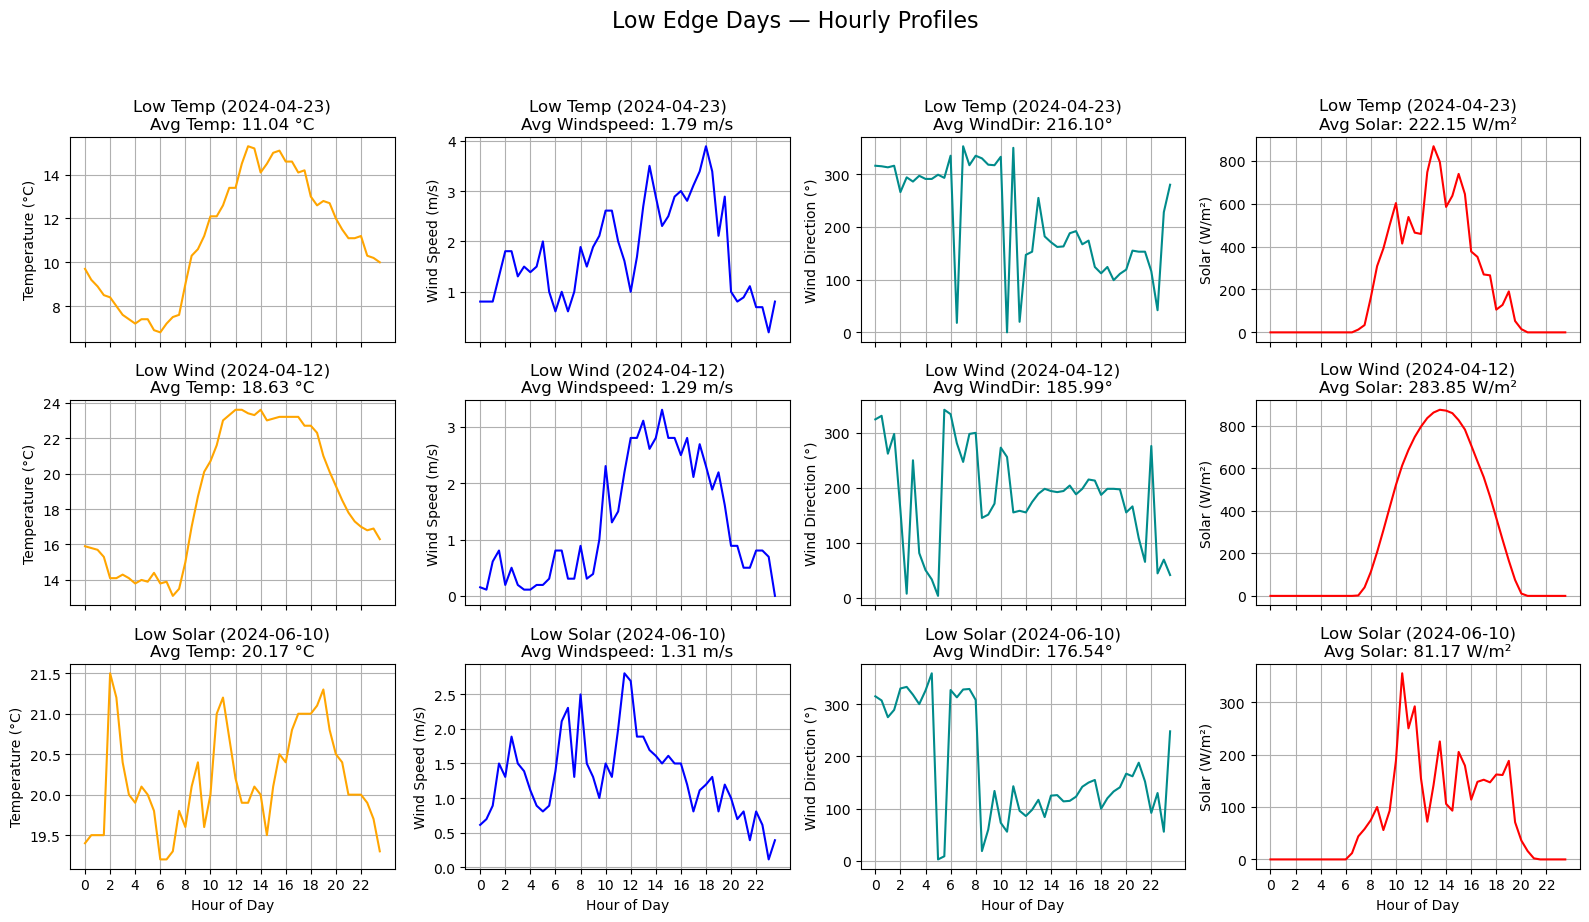

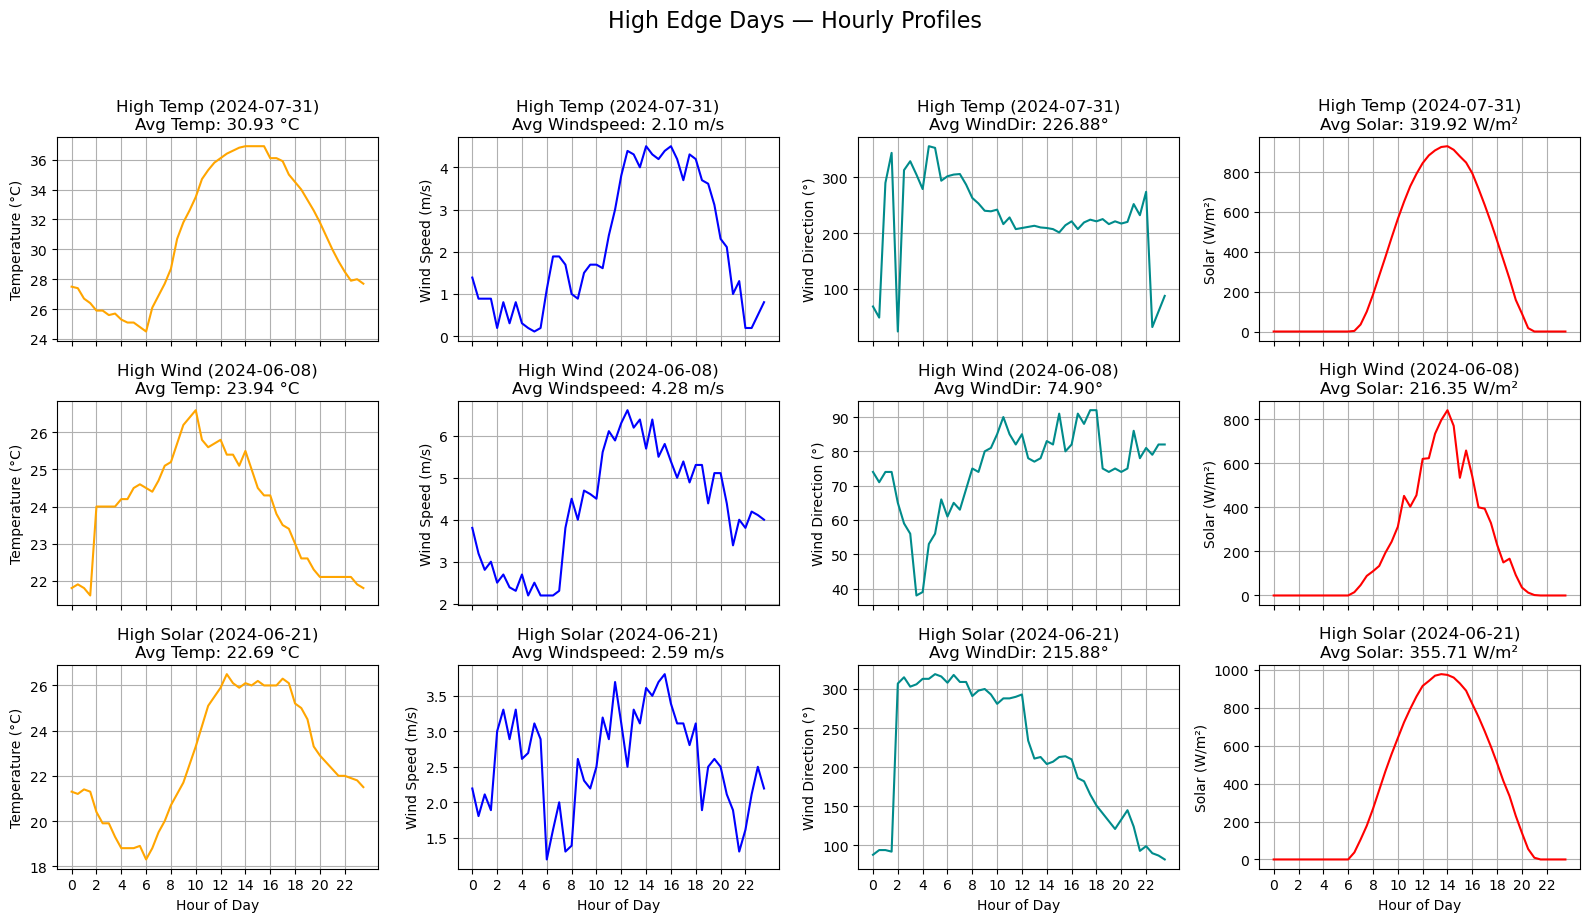

In [32]:
# Define a style dictionary for each feature
plot_style = {
    'Avg Temperature (C)': {
        'color': 'orange',
        'ylim': (5, 35),
        'ylabel': 'Temperature (°C)',
        'subtitle': lambda s: f"Avg Temp: {s.mean():.2f} °C"
    },
    'Avg Windspeed (m/s)': {
        'color': 'blue',
        'ylim': (0, 8),
        'ylabel': 'Wind Speed (m/s)',
        'subtitle': lambda s: f"Avg Windspeed: {s.mean():.2f} m/s"
    },
    'Avg Wind Direction': {
        'color': 'darkcyan',
        'ylim': (0, 360),
        'ylabel': 'Wind Direction (°)',
        'subtitle': lambda s: f"Avg WindDir: {s.mean():.2f}°"
    },
    'Avg Solar Irradiance (W/m2)': {
        'color': 'red',
        'ylim': (0, 1000),
        'ylabel': 'Solar (W/m²)',
        'subtitle': lambda s: f"Avg Solar: {s.mean():.2f} W/m²"
    }
}

def plot_days(day_list, suptitle_text, label_list=None):
    fig, axes = plt.subplots(
        nrows=len(day_list),
        ncols=len(feature_list),
        figsize=(4 * len(feature_list), 3 * len(day_list)),
        sharex=True
    )

    # Ensure 2D axes shape
    if len(day_list) == 1:
        axes = [axes]

    for row_idx, day in enumerate(day_list):
        day_df = full_days_merged[full_days_merged['Date'] == day].sort_index()
        for col_idx, feat in enumerate(feature_list):
            ax = axes[row_idx][col_idx]
            ax.plot(
                day_df['Hour'],
                day_df[feat],
                color=plot_style[feat]['color']
            )
            ax.set_ylabel(plot_style[feat]['ylabel'])
            label_base = label_list[row_idx] if label_list else f""
            label = f"{label_base} ({day})"
            ax.set_title(f"{label}\n{plot_style[feat]['subtitle'](day_df[feat])}")

            ax.grid(True)

    for ax in axes[-1]:
        ax.set_xlabel("Hour of Day")
        ax.set_xticks(range(0, 24, 2))

    plt.suptitle(f"{suptitle_text} — Hourly Profiles", fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# -----------------------------------------
# STEP 4 — Visualize All Three Groups
# 1️⃣ Cluster-representative days
cluster_labels = [f"Cluster {k}" for k, d in zip(representative_days_dict.keys(), cluster_top_days) if d in filtered_cluster_top_days]
plot_days(filtered_cluster_top_days, "Top Cluster Days", cluster_labels)

# 2️⃣ Lowest extremes
lowest_labels = ['Low Temp', 'Low Wind', 'Low Solar']
plot_days(filtered_lowest_extreme_days, "Low Edge Days", lowest_labels[:len(filtered_lowest_extreme_days)])

# 3️⃣ Highest extremes
highest_labels = ['High Temp', 'High Wind', 'High Solar']
plot_days(filtered_highest_extreme_days, "High Edge Days", highest_labels[:len(filtered_highest_extreme_days)])


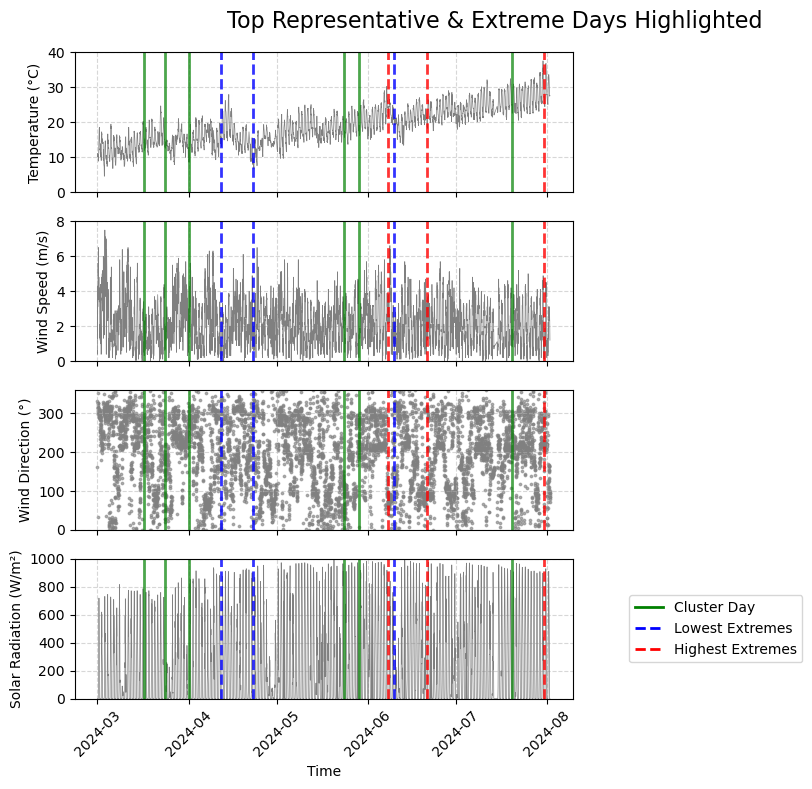

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

# Ensure windspeed in m/s exists
if 'Avg Windspeed (m/s)' not in data.columns:
    data['Avg Windspeed (m/s)'] = data['Avg Windspeed (km/h)'] / 3.6

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# 1) Temperature
axes[0].plot(data.index, data['Avg Temperature (C)'], color='gray', linewidth=0.5)
axes[0].set_ylim(0, 40)
axes[0].set_ylabel("Temperature (°C)")
axes[0].grid(True, linestyle="--", alpha=0.5)

# 2) Wind Speed
axes[1].plot(data.index, data['Avg Windspeed (m/s)'], color='gray', linewidth=0.5)
axes[1].set_ylim(0, 8)
axes[1].set_ylabel("Wind Speed (m/s)")
axes[1].grid(True, linestyle="--", alpha=0.5)

# 3) Wind Direction
axes[2].scatter(data.index, data['Avg Wind Direction'], color='gray', s=3, alpha=0.6)
axes[2].set_ylim(0, 360)
axes[2].set_ylabel("Wind Direction (°)")
axes[2].grid(True, linestyle="--", alpha=0.5)

# 4) Solar Radiation
axes[3].plot(data.index, data['Avg Solar Irradiance (W/m2)'], color='gray', linewidth=0.5)
axes[3].set_ylim(0, 1000)
axes[3].set_ylabel("Solar Radiation (W/m²)")
axes[3].set_xlabel("Time")
axes[3].grid(True, linestyle="--", alpha=0.5)

plt.xticks(rotation=45)

# --- Define line colors ---
line_styles = {
    'Cluster': {'color': 'green', 'label': 'Cluster Day'},
    'Lowest': {'color': 'blue', 'label': 'Lowest Extremes'},
    'Highest': {'color': 'red', 'label': 'Highest Extremes'}
}

# --- Draw vertical lines ---
# 1. Cluster Days
for date in filtered_cluster_top_days:
    dt = pd.to_datetime(date)
    for ax in axes:
        ax.axvline(dt, color=line_styles['Cluster']['color'], linewidth=2, alpha=0.7)

# 2. Lowest Extremes
for date in filtered_lowest_extreme_days:
    dt = pd.to_datetime(date)
    for ax in axes:
        ax.axvline(dt, color=line_styles['Lowest']['color'], linestyle='--', linewidth=2, alpha=0.8)

# 3. Highest Extremes
for date in filtered_highest_extreme_days:
    dt = pd.to_datetime(date)
    for ax in axes:
        ax.axvline(dt, color=line_styles['Highest']['color'], linestyle='--', linewidth=2, alpha=0.8)

# --- Create single legend ---
handles = [
    mlines.Line2D([], [], color=line_styles['Cluster']['color'], linewidth=2, label=line_styles['Cluster']['label']),
    mlines.Line2D([], [], color=line_styles['Lowest']['color'], linestyle='--', linewidth=2, label=line_styles['Lowest']['label']),
    mlines.Line2D([], [], color=line_styles['Highest']['color'], linestyle='--', linewidth=2, label=line_styles['Highest']['label']),
]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.1, 0.5))

# Final formatting
plt.suptitle("Top Representative & Extreme Days Highlighted", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


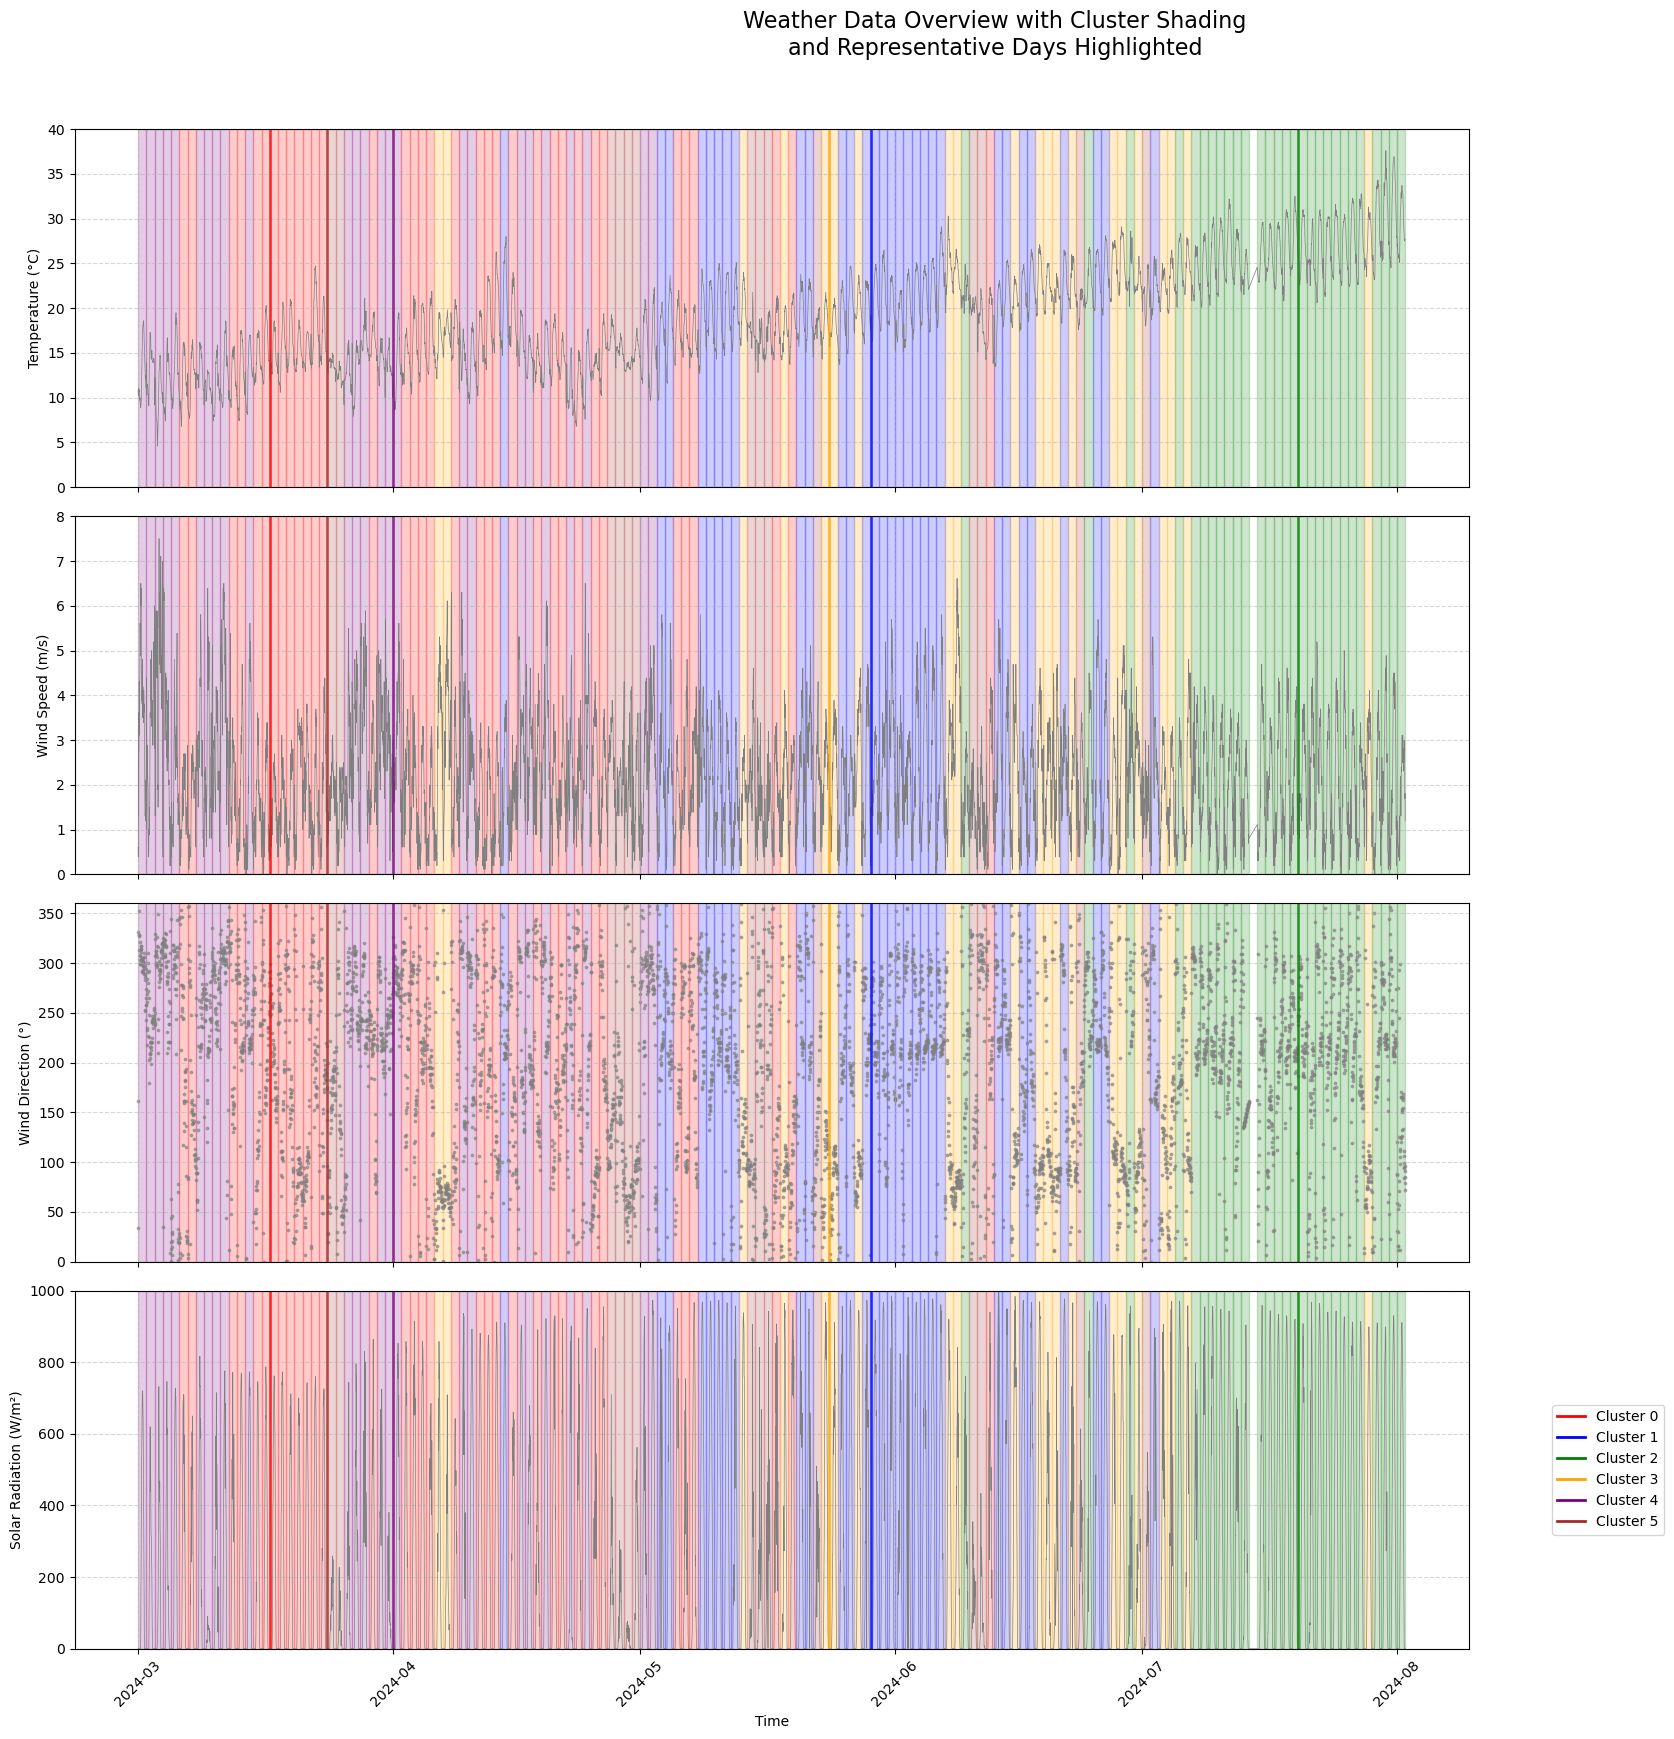

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

# -------------------------------
# Assume:
# - 'data' is your preprocessed DataFrame with a DatetimeIndex.
# - 'daily_cluster_df' is a DataFrame with columns ['Date', 'Cluster'] for each full day used in clustering.
# - 'representative_days_dict' is defined as, for example:
#   {
#       0: [datetime.date(2024, 7, 9), datetime.date(2024, 7, 8)],
#       1: [datetime.date(2024, 4, 30), datetime.date(2024, 5, 24)],
#       2: [datetime.date(2024, 4, 10), datetime.date(2024, 4, 1)],
#       3: [datetime.date(2024, 4, 12), datetime.date(2024, 5, 11)],
#       4: [datetime.date(2024, 6, 27), datetime.date(2024, 7, 3)],
#       5: [datetime.date(2024, 3, 16), datetime.date(2024, 3, 17)]
#   }
# -------------------------------

# Ensure wind speed in m/s exists
if 'Avg Windspeed (m/s)' not in data.columns:
    data['Avg Windspeed (m/s)'] = data['Avg Windspeed (km/h)'] / 3.6

# Create a figure with 4 subplots (one for each variable)
fig, axes = plt.subplots(4, 1, figsize=(20, 17), sharex=True)

# Plot full data in gray
# Temperature
axes[0].plot(data.index, data['Avg Temperature (C)'], color='gray', linewidth=0.5)
axes[0].set_ylim(0, 40)
axes[0].set_ylabel("Temperature (°C)")
axes[0].grid(True, linestyle="--", alpha=0.5)

# Wind Speed (m/s)
axes[1].plot(data.index, data['Avg Windspeed (m/s)'], color='gray', linewidth=0.5)
axes[1].set_ylim(0, 8)
axes[1].set_ylabel("Wind Speed (m/s)")
axes[1].grid(True, linestyle="--", alpha=0.5)

# Wind Direction (°)
axes[2].scatter(data.index, data['Avg Wind Direction'], color='gray', marker='o', s=3, alpha=0.6)
axes[2].set_ylim(0, 360)
axes[2].set_ylabel("Wind Direction (°)")
axes[2].grid(True, linestyle="--", alpha=0.5)

# Solar Radiation (W/m²)
axes[3].plot(data.index, data['Avg Solar Irradiance (W/m2)'], color='gray', linewidth=0.5)
axes[3].set_ylim(0, 1000)
axes[3].set_ylabel("Solar Radiation (W/m²)")
axes[3].set_xlabel("Time")
axes[3].grid(True, linestyle="--", alpha=0.5)

plt.xticks(rotation=45)

# -------------------------------
# Define cluster colors (customize as needed)
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown'
}

# -------------------------------
# Shade each full day according to its cluster label
# -------------------------------
# daily_cluster_df contains each full day (as a Python date) with its assigned cluster.
for _, row in daily_cluster_df.iterrows():
    day_dt = pd.to_datetime(row['Date'])  # midnight of that day
    cluster_label = row['Cluster']
    for ax in axes:
        ax.axvspan(day_dt, day_dt + pd.Timedelta(days=1),
                   color=cluster_colors.get(cluster_label, 'gray'),
                   alpha=0.2, zorder=0)

# -------------------------------
# Overlay vertical lines for the representative days (best two fits per cluster)
# -------------------------------
for cluster, day_list in representative_days_dict.items():
    if not day_list:
        continue
    top_day = day_list[0]  # Only use the first day
    rep_datetime = pd.to_datetime(top_day)  # midnight
    for ax in axes:
        ax.axvline(
            rep_datetime,
            color=cluster_colors.get(cluster, 'black'),
            linestyle='-',
            linewidth=2,
            alpha=0.7
        )

# -------------------------------
# Create a global legend for the cluster colors (vertical lines)
# -------------------------------
legend_handles = []
for cluster, color in cluster_colors.items():
    handle = mlines.Line2D([], [], color=color, linestyle='-', linewidth=2, label=f'Cluster {cluster}')
    legend_handles.append(handle)
plt.legend(handles=legend_handles, loc='center', bbox_to_anchor=(1.1, 0.5))

plt.suptitle("Weather Data Overview with Cluster Shading\nand Representative Days Highlighted", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
